In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import elementary_charge as q
from scipy.constants import electron_mass as me
from scipy.constants import physical_constants
from scipy.constants import epsilon_0 as eps0
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as N_A
from random import uniform as uni
from uncertainties import ufloat
import eckstein_yield as ey

aB = physical_constants['Bohr radius'][0]
print(f"Bohr radius = {aB}")
print(f"Elem. Charge = {q}")
print(f"Epsilon_0 = {eps0}")
print(f"Electron mass = {me}")
print(f"Boltzmann Constant = {kB}")

Bohr radius = 5.29177210903e-11
Elem. Charge = 1.602176634e-19
Epsilon_0 = 8.8541878128e-12
Electron mass = 9.1093837015e-31
Boltzmann Constant = 1.380649e-23


In [2]:
def bohm_current_density(n0, Te_eV, M):
    Te = Te_eV * q
    c = 0.606
    return c* n0 * q * (Te/M)**0.5

def j_CL(M , V, d):
    ''' Calculates the Child-Langmuir current density
    
    Arguments
    M -- ion mass, kg 
    V -- total potential, Vd - Va
    d -- intergrid distance
    '''
    return (4 * eps0 / 9) * (2 * q / M)**(0.5) * (V**(3/2) / (d**2))

M_Xe = 131
M = M_Xe / N_A # g
M_kg = M / 1000 # kg

M_kg

2.175306177997739e-25

In [3]:
ni = ufloat(1e17, 0.5e17)   # m-3
Te_eV = ufloat(5, 2.5)   # eV
V = 1500    # V
d = (0.38+0.7) / 1000 # m
Rth = 0.15
IB = 1.76
Ib = ufloat(3e-4, 2e-4)
rs = (1.91/2) / 1000

jBohm = bohm_current_density(ni, Te_eV, M_kg)
IBohm = jBohm * np.pi * rs*rs
jCL   = j_CL(M_kg, V, d)
jB_avg = IB / (np.pi * Rth*Rth)
jB_cent = Ib / (np.pi * rs*rs)

print(f"Bohm current density:           {jBohm:0.2f} A m-2")
print(f"Bohm current:                   {IBohm*1000:0.2f} mA ")
print(f"Center current:                 {Ib*1000:0.3f} mA")
print(f"Actual-to-Bohm Current ratio:   {Ib / IBohm:0.3f}")
print(f"Child-Langmuir current density: {jCL:0.2f} A m-2")
print(f"Actual Avg. Current Density:    {jB_avg:0.2f} A m-2")
print(f"Actual Center Current Density:  {jB_cent:0.2f} A m-2")

print(f" --- ")
print(f"Bohm-to-CL ratio:               {jBohm / jCL:0.5f} ")
print(f"B_avg-to-CL ratio:              {jB_avg / jCL:0.5f} ")
print(f"B_avg-to-Bohm ratio:            {jB_avg / jBohm:0.5f} ")
print(f"B_cent-to-CL ratio:             {jB_cent / jCL:0.5f} ")
print(f"B_cent-to-Bohm ratio:           {jB_cent / jBohm:0.5f} ")


Bohm current density:           18.63+/-10.42 A m-2
Bohm current:                   0.05+/-0.03 mA 
Center current:                 0.300+/-0.200 mA
Actual-to-Bohm Current ratio:   5.620+/-4.889
Child-Langmuir current density: 237.88 A m-2
Actual Avg. Current Density:    24.90 A m-2
Actual Center Current Density:  104.70+/-69.80 A m-2
 --- 
Bohm-to-CL ratio:               0.07832+/-0.04378 
B_avg-to-CL ratio:              0.10467 
B_avg-to-Bohm ratio:            1.33634+/-0.74704 
B_cent-to-CL ratio:             0.44015+/-0.29343 
B_cent-to-Bohm ratio:           5.61955+/-4.88915 


In [45]:
rs
M_kg

2.175306177997739e-25

In [46]:
jBohm_test = bohm_current_density(1e17, 5, M_kg)
jBohm_test

15.373062770395045

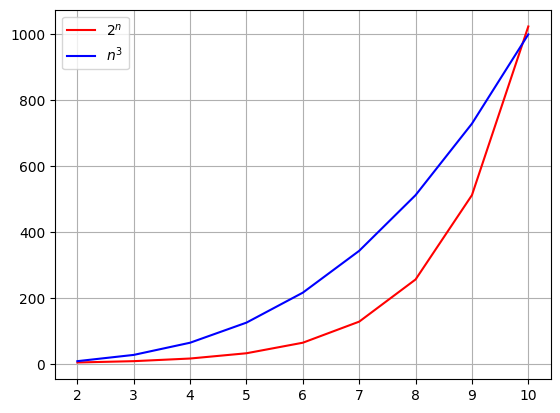

In [7]:
import numpy as np
import matplotlib.pyplot as plt
n = np.arange(2, 11)
plt.plot(n, 2**n, 'r', label=r"$2^n$")
plt.plot(n, n**3, 'b', label=r"$n^3$")
plt.grid(which='both')
plt.legend()

20.974453871585574
44.10515887684273


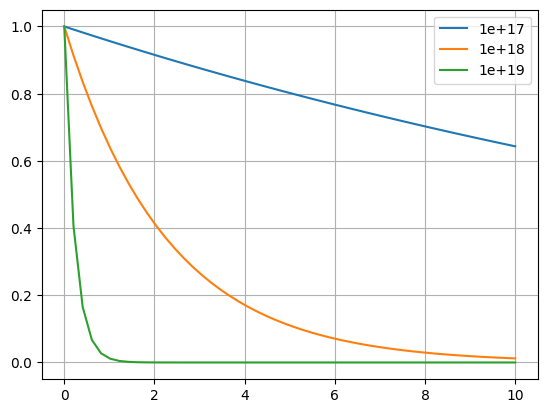

In [20]:
na = [1e17, 1e18, 1e19]
x = np.linspace(0, 10)
sigma = 87.3 - 13.6*np.log10(1500)
sigma2 = 45.7 - 8.9*np.log10(600)
print(sigma2)
print(sigma)
for nai in na:
    lam = ( nai * sigma * (1e-20) ) ** (-1)
    P = np.exp(-x/lam)
    plt.plot(x, P, label=f"{nai:}")

plt.grid(which='both')
plt.legend()

